<a href="https://colab.research.google.com/github/punkmic/Credit-Score-classification-using-k-nearest-neighbors/blob/master/Credit_Score_classification_using_k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Score classification using k-nearest neighbors**





The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.
While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

Reference

IBM:
https://www.ibm.com/topicsknn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point

### Import dependecies

In [97]:
try:
  import opendatasets as od
except:
  !pip install opendatasets
  import opendatasets as od
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Download dataset

In [98]:
def download_data(url, data_dir=None):
  '''Helper function to download dataset from Kaggle'''
  if  not None:
    od.download(url, data_dir)
  else:
    od.download(url)

In [99]:
# data to download
url = 'https://www.kaggle.com/datasets/clkmuhammed/creditscoreclassification'

# define the directory to save data
data_dir = 'datasets/'

# download data
download_data(url, data_dir)

Skipping, found downloaded files in "datasets/creditscoreclassification" (use force=True to force download)


In [100]:
def read_data(downloaded_file_path_csv):
  '''Helper function to read data saved in colab files'''
  if path.exists(downloaded_file_path_csv):
    return pd.read_csv(downloaded_file_path_csv)

In [101]:
# location where the file was saved
downloaded_file_path_csv = f'{data_dir}creditscoreclassification/train.csv'

# read csv as Dataframe object
df = read_data(downloaded_file_path_csv)

### Prepare data

Lower columns name

In [102]:
# lower columns names
df.columns = map(str.lower, df.columns)
df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


Print target/label

In [103]:
# print unique target (credit score) values
df['credit_score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

Print data types

In [104]:
# print types
df.dtypes

id                            int64
customer_id                   int64
month                         int64
name                         object
age                         float64
ssn                         float64
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts           float64
num_credit_card             float64
interest_rate               float64
num_of_loan                 float64
type_of_loan                 object
delay_from_due_date         float64
num_of_delayed_payment      float64
changed_credit_limit        float64
num_credit_inquiries        float64
credit_mix                   object
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age          float64
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                

Drop columns that are not useful or important

In [105]:
# drop columns
df.drop(['id', 'customer_id', 'month', 'name','age', 'occupation', 'ssn', 'type_of_loan', 'num_credit_card'], axis=1, inplace=True)

# print columns
df.columns

Index(['annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'interest_rate', 'num_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

Transform categorical variables into numerical

In [106]:
# list of columns to transform
categorical_cols = ['credit_mix', 'payment_of_min_amount', 'payment_behaviour']

# dummies dataframe of categorical columns
dummies = pd.get_dummies(df, columns=categorical_cols)

# join original dataframe and dummies
df = pd.merge(df, dummies)

# drop categorical columns
df.drop(categorical_cols, axis=1, inplace=True)
df.columns

Index(['annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'interest_rate', 'num_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
       'monthly_balance', 'credit_score', 'credit_mix_Bad', 'credit_mix_Good',
       'credit_mix_Standard', 'payment_of_min_amount_NM',
       'payment_of_min_amount_No', 'payment_of_min_amount_Yes',
       'payment_behaviour_High_spent_Large_value_payments',
       'payment_behaviour_High_spent_Medium_value_payments',
       'payment_behaviour_High_spent_Small_value_payments',
       'payment_behaviour_Low_spent_Large_value_payments',
       'payment_behaviour_Low_spent_Medium_value_payments',
       'payment_behaviour_Low_spent_Small_value_payments'],
      dtype='object')

### Train KNeighborsClassifier model

In [107]:
%time 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# create arrays for the features and the target variable
X = df.drop('credit_score', axis=1).values
y = df['credit_score'].values

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X, y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


KNeighborsClassifier(n_neighbors=6)

### Model performance

Accuracy

In [108]:
# print the accuracy
knn.score(X_train, y_train)

0.8413875

Cross validation prediction

In [109]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

F1-Score

In [110]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average='macro')

0.6866291999271135

Confusion Matrix

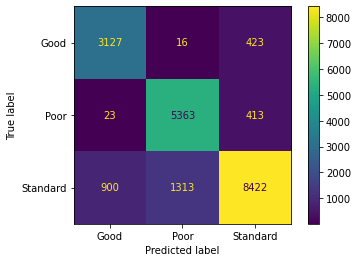

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
cm

Model complexy and over/undefitting

In [112]:
def plot_accuracy_by_neighbor(neighbors, X_train, y_train, X_test, y_test):
 neighbors = np.arange(1, neighbors + 1)
 train_accuracies = {}
 test_accuracies = {}

 for neighbor in neighbors:
   print(f'Training model with {neighbor} neighbor(s)')
   knn = KNeighborsClassifier(n_neighbors=neighbor)
   knn.fit(X_train, y_train)
   train_accuracies[neighbor] = knn.score(X_train, y_train)
   test_accuracies[neighbor] = knn.score(X_test, y_test)

 plt.title("KNN: Varying Number of Neighbors")
 plt.plot(neighbors, list(train_accuracies.values())[:neighbors.size], label="Training Accuracy")
 plt.plot(neighbors, list(test_accuracies.values())[:neighbors.size], label="Testing Accuracy")
 plt.legend()
 plt.xlabel("Number of Neighbors")
 plt.ylabel("Accuracy")
 plt.show()
 
 

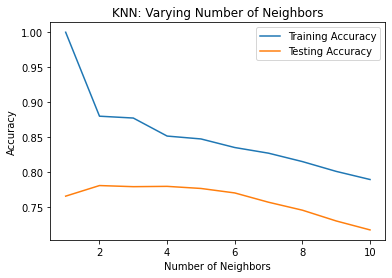

In [113]:
# plot accuracy vs number of neighbors
plot_accuracy_by_neighbor(10, X_train, y_train, X_test, y_test)